In [10]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='ticks')

In [2]:
# Load in a short fragment of audio

y, sr = librosa.load(librosa.util.example_audio_file(), duration=5, offset=25, sr=None)

In [3]:
# Compute the spectrogram

D = librosa.stft(y)

In [4]:
# Separate magnitude and phase
# librosa.magphase will do this, but it returns phase as exp(1.j * phi)
# for visualization, we just want phi itself

S, phi = np.abs(D), np.angle(D)

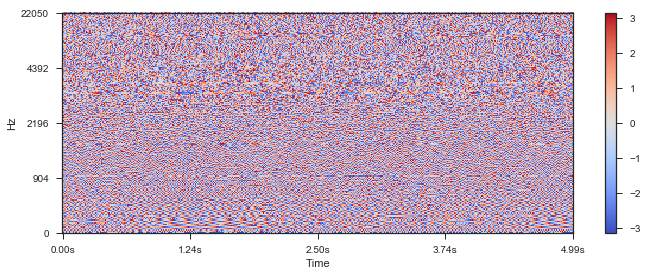

In [5]:
# First thing: plot the phase directly
# Not much obvious structure here
# We'll use a log-frequency axis scaling

plt.figure(figsize=(10, 4))
librosa.display.specshow(phi, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()
plt.tight_layout();

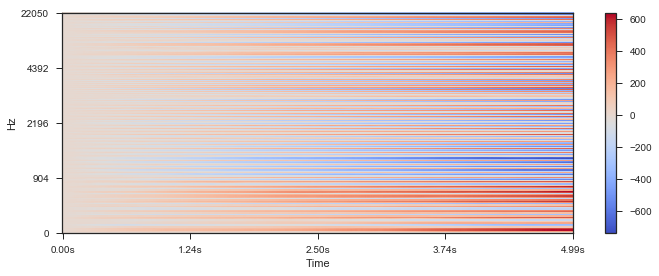

In [6]:
# The representation above is difficult to understand visually for a couple of reasons:
#   1) phase wraps around +- pi, so red and blue are actually the same
#   2) frames overlap in time, so what matters isn't so much the phase at any point, but the way it evolves
#
# Unwrapping the phase in time can help with these issues, but we're not done yet

phi_unwrap = np.unwrap(phi, axis=1)

# Unwrap the phase along the time axis
plt.figure(figsize=(10, 4))
librosa.display.specshow(phi_unwrap, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()
plt.tight_layout();

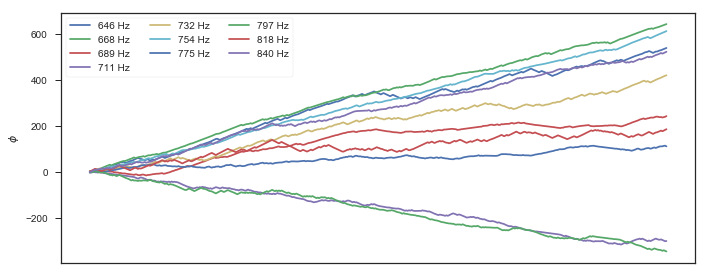

In [7]:
# If you pick any row of the unwrapped phase matrix, you see that it generally increases linearly in time,
# with a few discontinuities.  These are usually the interesting parts.

plt.figure(figsize=(10, 4))
plt.plot(phi_unwrap[30:40].T)
plt.legend(['{:.0f} Hz'.format(_) for _ in librosa.fft_frequencies(sr=sr)[30:40]],
           frameon=True, ncol=3, loc='best')
plt.axis('tight')
plt.xticks([])
plt.ylabel('$\phi$')
plt.tight_layout()


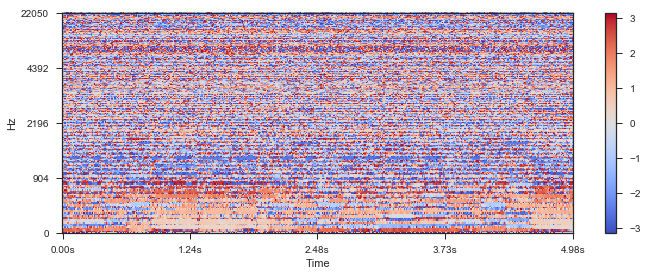

In [8]:
# To visualize this more clearly, we can compute the time difference of unwrapped phase and plot that instead

delta_phi = np.diff(phi_unwrap, axis=1)

# Only plot the time differential of phase
plt.figure(figsize=(10, 4))
librosa.display.specshow(delta_phi, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()
plt.tight_layout();

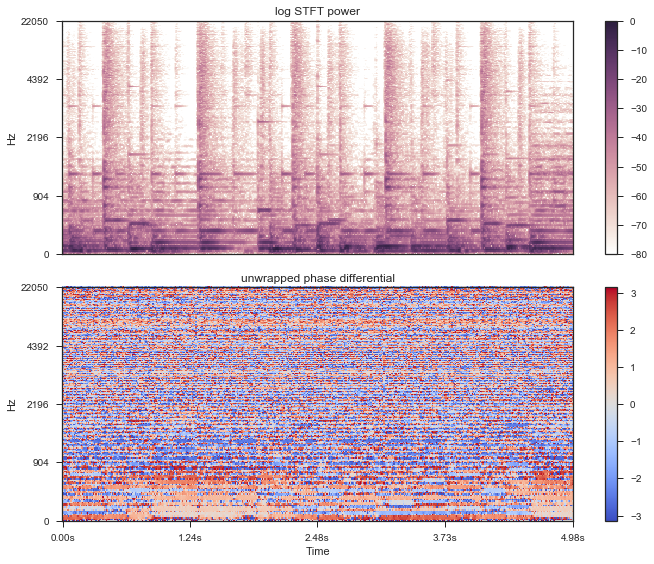

In [9]:
# Plot phase differential and magnitude on a log-frequency scale

plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
librosa.display.specshow(librosa.logamplitude(S**2, ref_power=np.max), y_axis='log', sr=sr)
plt.title('log STFT power')
plt.colorbar()

plt.subplot(2,1,2)
librosa.display.specshow(delta_phi, y_axis='log', x_axis='time', sr=sr)
plt.title('unwrapped phase differential')
plt.colorbar()
plt.tight_layout();